In [12]:
#Data preporcessing
data = pd.read_csv("diabetes.csv")
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

2) a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.
**Ans:** So, Here i took seed value as 30 and proceed with generating values and comparison using heat map

Sample Mean Glucose: 116.56
Sample Highest Glucose: 183
Population Mean Glucose: 120.89453125
Population Highest Glucose: 199


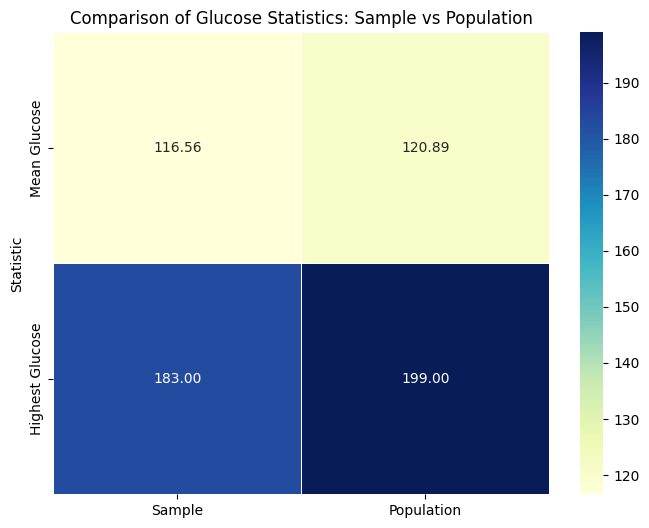

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes dataset
data = pd.read_csv("diabetes.csv")

# Set seed for reproducibility
np.random.seed(30)

# Take a random sample of 25 observations
sample = data.sample(n=25)

# Calculate statistics for the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

# Calculate statistics for the entire population
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

# Print the values
print("Sample Mean Glucose:", sample_mean_glucose)
print("Sample Highest Glucose:", sample_highest_glucose)
print("Population Mean Glucose:", population_mean_glucose)
print("Population Highest Glucose:", population_highest_glucose)


# Create a dataframe to hold the values
data = {
    'Statistic': ['Mean Glucose', 'Highest Glucose'],
    'Sample': [sample_mean_glucose, sample_highest_glucose],
    'Population': [population_mean_glucose, population_highest_glucose]
}
data_heatmap = pd.DataFrame(data)

# Set 'Statistic' as the index
data_heatmap.set_index('Statistic', inplace=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_heatmap, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Comparison of Glucose Statistics: Sample vs Population')
plt.show()

b)Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

98th percentile of BMI for the sample 44.484
98th percentile of BMI for the population 47.52599999999996


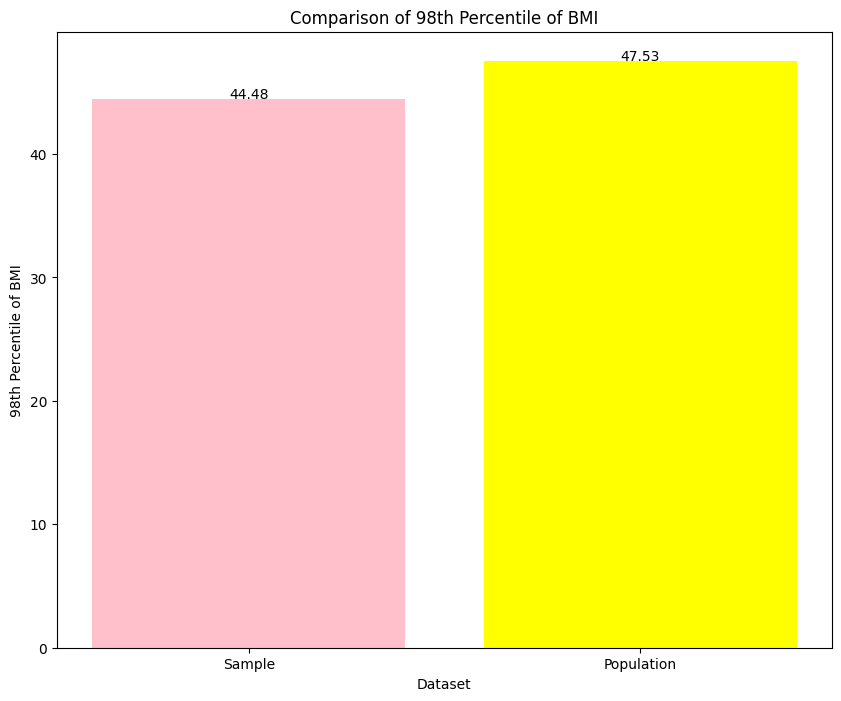

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = pd.read_csv("diabetes.csv")

# Set seed for reproducibility
np.random.seed(30)

# Take a random sample of 25 observations
sample = data.sample(n=25)

# Calculate the 98th percentile of BMI for the sample and population
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)

print("98th percentile of BMI for the sample",sample_98th_percentile_bmi)
print("98th percentile of BMI for the population",population_98th_percentile_bmi)

# Create a bar graph to compare the 98th percentile of BMI
plt.figure(figsize=(10, 8))

# Data
labels = ['Sample', 'Population']
percentiles = [sample_98th_percentile_bmi, population_98th_percentile_bmi]

# Bar graph
plt.bar(labels, percentiles, color=['pink', 'yellow'])

# Add labels and title
plt.title('Comparison of 98th Percentile of BMI')
plt.xlabel('Dataset')
plt.ylabel('98th Percentile of BMI')

# Show the values on the bars
for i, v in enumerate(percentiles):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center')

plt.show()

c)Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings

Mean blood pressure 69.10546875
Standrad Deviation blood pressure 19.355807170644777
Percentile blood pressure 80.0


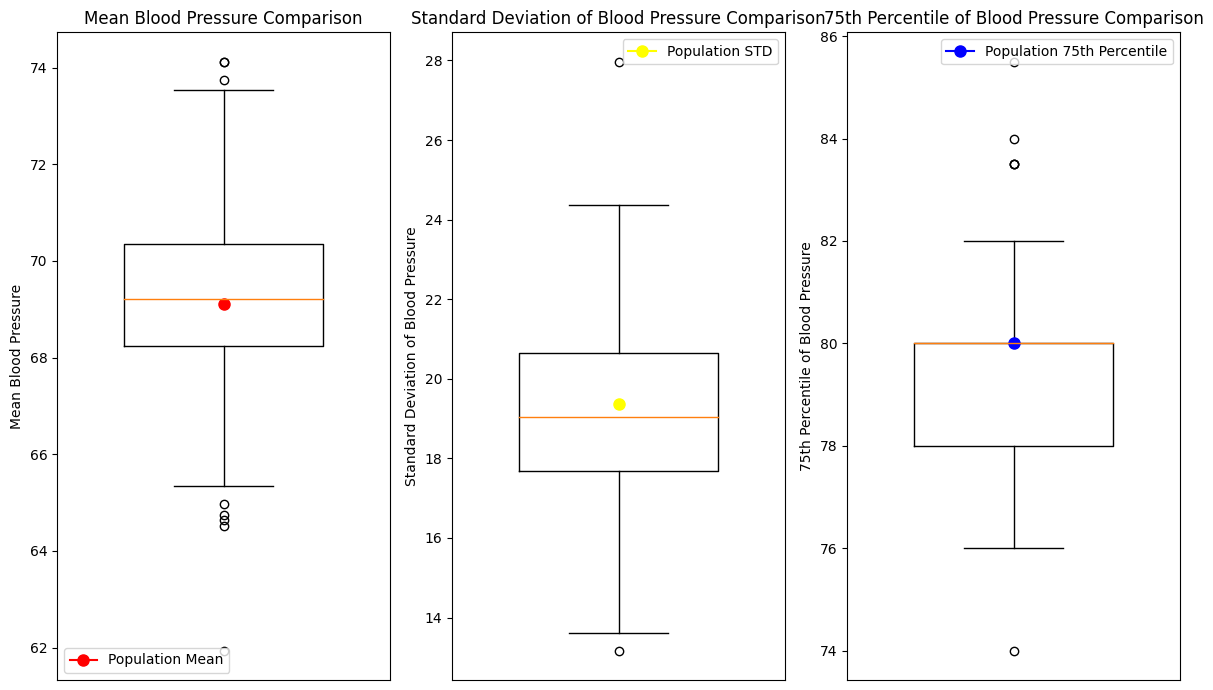

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = pd.read_csv("diabetes.csv")

# Set seed for reproducibility
np.random.seed(30)

# Function to calculate statistics from a sample
def calculate_statistics(sample):
    mean_bp = sample['BloodPressure'].mean()
    std_bp = sample['BloodPressure'].std()
    percentile_75_bp = np.percentile(sample['BloodPressure'], 75)
    return mean_bp, std_bp, percentile_75_bp

# Create empty lists to store statistics for each sample
mean_bp_list = []
std_bp_list = []
percentile_75_bp_list = []

# Perform bootstrap resampling
num_samples = 500
sample_size = 150
for _ in range(num_samples):
    sample = data.sample(n=sample_size, replace=True)
    mean_bp, std_bp, percentile_75_bp = calculate_statistics(sample)
    mean_bp_list.append(mean_bp)
    std_bp_list.append(std_bp)
    percentile_75_bp_list.append(percentile_75_bp)

# Calculate statistics for the population
population_mean_bp = data['BloodPressure'].mean()
population_std_bp = data['BloodPressure'].std()
population_percentile_75_bp = np.percentile(data['BloodPressure'], 75)

print("Mean blood pressure",population_mean_bp)
print("Standrad Deviation blood pressure",population_std_bp)
print("Percentile blood pressure",population_percentile_75_bp)

# Create box plots to compare the distributions
plt.figure(figsize=(12, 7))

# Box plot for mean BloodPressure
plt.subplot(1, 3, 1)
plt.boxplot(mean_bp_list, positions=[1], widths=0.6)
plt.plot(1, population_mean_bp, marker='o', markersize=8, color="red", label="Population Mean")
plt.title('Mean Blood Pressure Comparison')
plt.ylabel('Mean Blood Pressure')
plt.xticks([], [])
plt.legend()

# Box plot for standard deviation of BloodPressure
plt.subplot(1, 3, 2)
plt.boxplot(std_bp_list, positions=[1], widths=0.6)
plt.plot(1, population_std_bp, marker='o', markersize=8, color="yellow", label="Population STD")
plt.title('Standard Deviation of Blood Pressure Comparison')
plt.ylabel('Standard Deviation of Blood Pressure')
plt.xticks([], [])
plt.legend()

# Box plot for 75th percentile of BloodPressure
plt.subplot(1, 3, 3)
plt.boxplot(percentile_75_bp_list, positions=[1], widths=0.6)
plt.plot(1, population_percentile_75_bp, marker='o', markersize=8, color="blue", label="Population 75th Percentile")
plt.title('75th Percentile of Blood Pressure Comparison')
plt.ylabel('75th Percentile of Blood Pressure')
plt.xticks([], [])
plt.legend()

plt.tight_layout()
plt.show()
